In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
import cv2 as cv
import os, glob, shutil

In [3]:
path = 'datasets/COVID19_Xray/'
train = os.listdir(path)

#possible labels
labels=["covid", "normal", "pneumonia"]
print (f'The labels are {labels}')

#image size
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

images = []
tags = []
#Read all images via label
for label in labels:
    direc = os.path.join(path, label)
    class_num = labels.index(label)
    
    #for each image in folder
    for image in os.listdir(direc):
        #Read and greyscale and image
        image_read = cv.imread(os.path.join(direc,image))
        #Resize image
        image_resized = cv.resize(image_read,(image_size,image_size))
        #Add image to list
        images.append(image_resized)
        tags.append(class_num)
        
model = tf.keras.applications.MobileNetV2(include_top=False,
weights='imagenet', input_shape=(224, 224, 3))

images = np.array(images)

predictions = model.predict(images)

pred_images = predictions.reshape(images.shape[0], -1)

The labels are ['covid', 'normal', 'pneumonia']
All images to be resized into 224*224 pixels


In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [76]:


k = 10
kf = KFold(n_splits=k, random_state=None)

acc_score = []

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

counter = 0

for train_index , test_index in kf.split(pred_images):
    counter+=1
    X_train , X_test = pred_images[train_index,:],pred_images[test_index,:]
    y_train = []
    y_test = []
    
    for index in train_index:
        y_train.append(tags[index])
    
    for index in test_index:
        y_test.append(tags[index])
        
    tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    pred_values = tree_clf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
    
    print(counter)
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

1
2
3
4
5
6
7
8
9
10
accuracy of each fold - [0.574235807860262, 0.6462882096069869, 0.42139737991266374, 0.6200873362445415, 0.7096069868995634, 0.7986870897155361, 0.5229759299781181, 0.6564551422319475, 0.6805251641137856, 0.7571115973741794]
Avg accuracy : 0.6387370643937584


In [1]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(pred_images, tags)

NameError: name 'DecisionTreeClassifier' is not defined

[Text(167.4, 190.26, 'X[25654] <= 1.36\ngini = 0.667\nsamples = 4575\nvalue = [1525, 1525, 1525]'),
 Text(83.7, 135.9, 'X[18185] <= 1.229\ngini = 0.569\nsamples = 2329\nvalue = [894, 213, 1222]'),
 Text(41.85, 81.53999999999999, 'X[49230] <= 0.134\ngini = 0.478\nsamples = 976\nvalue = [669, 121, 186]'),
 Text(20.925, 27.180000000000007, 'gini = 0.145\nsamples = 559\nvalue = [516, 21, 22]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.653\nsamples = 417\nvalue = [153, 100, 164]'),
 Text(125.55000000000001, 81.53999999999999, 'X[30568] <= 3.372\ngini = 0.381\nsamples = 1353\nvalue = [225, 92, 1036]'),
 Text(104.625, 27.180000000000007, 'gini = 0.246\nsamples = 1138\nvalue = [109, 48, 981]'),
 Text(146.475, 27.180000000000007, 'gini = 0.602\nsamples = 215\nvalue = [116, 44, 55]'),
 Text(251.10000000000002, 135.9, 'X[57886] <= 0.383\ngini = 0.562\nsamples = 2246\nvalue = [631, 1312, 303]'),
 Text(209.25, 81.53999999999999, 'X[22503] <= 2.158\ngini = 0.488\nsamples = 1899\nvalue

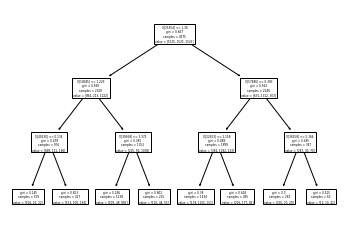

In [24]:
plot_tree(tree_clf)

In [29]:
for i in range(len(tags)):
    #calculates accuracy 
    if tags[i] == tree_clf.predict(pred_images[i].reshape(1, -1)):
        correct += 1
    i = i + 1
    
#Calculate percentage of correct guesses    
print("Correct: " + str(((correct/i)*100)) + "%")  

Correct: 73.53005464480874%


Find optimal Tree depth

In [21]:
accuracy = []
max_depth = 10
corr_array = []

for i in range(max_depth):
    tree_clf = DecisionTreeClassifier(max_depth=i+1, random_state=42)
    tree_clf.fit(train_data, train_tags)
    
    correct = 0
    for count in range(len(test_tags)):
        #calculates accuracy 
        if test_tags[count] == tree_clf.predict(test_data[count].reshape(1, -1)):
            correct += 1
    
    #Calculate percentage of correct guesses
    print(i)
    corr_array.append(correct/len(test_tags))

0
1
2
3
4
5
6
7
8
9


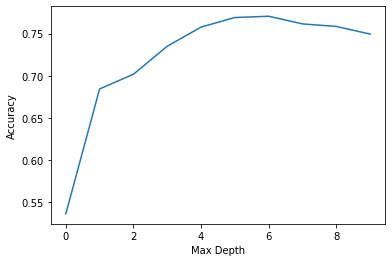

In [23]:
plt.plot(range(10), corr_array)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.show()

Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets

In [27]:
import random

train_data = []
train_tags = []

test_data = []
test_tags = []

for i in range(len(tags)):
    if random.randint(1, 100) <= 70:
        train_data.append(pred_images[i])
        train_tags.append(tags[i])
    else:
        test_data.append(pred_images[i])
        test_tags.append(tags[i])

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(train_data, train_tags)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [30]:
correct_test = 0
correct_train = 0

for count in range(len(test_tags)):
    #calculates accuracy 
    if test_tags[count] == tree_clf.predict(test_data[count].reshape(1, -1)):
        correct_test += 1
        
for count in range(len(train_tags)):
    #calculates accuracy 
    if train_tags[count] == tree_clf.predict(train_data[count].reshape(1, -1)):
        correct_train += 1
    
#Calculate percentage of correct guesses    
print("Correct Train: " + str(((correct_train/len(train_tags))*100)) + "%")
print("Correct Test: " + str(((correct_test/len(test_tags))*100)) + "%")

Correct Train: 84.5079365079365%
Correct Test: 74.66666666666667%


Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets

In [32]:
train_data = []
train_tags = []

test_data = []
test_tags = []

for i in range(len(tags)):
    if random.randint(1, 100) <= 40:
        train_data.append(pred_images[i])
        train_tags.append(tags[i])
    else:
        test_data.append(pred_images[i])
        test_tags.append(tags[i])

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(train_data, train_tags)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
correct_test = 0
correct_train = 0

for count in range(len(test_tags)):
    #calculates accuracy 
    if test_tags[count] == tree_clf.predict(test_data[count].reshape(1, -1)):
        correct_test += 1
        
for count in range(len(train_tags)):
    #calculates accuracy 
    if train_tags[count] == tree_clf.predict(train_data[count].reshape(1, -1)):
        correct_train += 1
    
#Calculate percentage of correct guesses    
print("Correct Train: " + str(((correct_train/len(train_tags))*100)) + "%")
print("Correct Test: " + str(((correct_test/len(test_tags))*100)) + "%")

Correct Train: 86.64529914529915%
Correct Test: 77.28449870514244%


As the set with 30 test / 70 train underperforms against the 60 test / 40 train it can be concluded that the first set is overfitted and too specialised